Q1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the McCulloch-Pitts neuron class
class McCulloch_Pitts_Neuron:
    def __init__(self, weights, threshold):
        self.weights = np.array(weights)  # Initialize weights
        self.threshold = threshold  # Set threshold

    def model(self, x):
        """ Activation function: if weighted sum exceeds threshold, return 1; otherwise, return 0 """
        if np.dot(self.weights, x) >= self.threshold:
            return 1  # Neuron activates
        else:
            return 0  # Neuron remains inactive


In [ ]:
# Function to check if a point is inside the triangle
def is_inside_triangle(x, y):
    # Define neurons representing triangle boundaries
    neuron1 = McCulloch_Pitts_Neuron([1, -1], 0)   # Left boundary
    neuron2 = McCulloch_Pitts_Neuron([-1, -1], -2)  # Right boundary
    neuron3 = McCulloch_Pitts_Neuron([0, 1], 2.5)  # Upper boundary

    # Evaluate neuron activations
    z1 = neuron1.model([x, y])
    z2 = neuron2.model([x, y])
    z3 = neuron3.model([x, y])

    # A point is inside the triangle if all three neurons activate
    return 1 if (z1 and z2 and z3) else 0


In [ ]:
import numpy as np

# Generate random points
num_points = 2000
x_values = np.random.uniform(-1, 3, num_points)  # X values between 0 and 3
y_values = np.random.uniform(-1, 3, num_points)  # Y values between 0 and 3

# Lists for classified points
inside_points = []
outside_points = []

# Debugging: Print count of processed points
inside_count = 0
outside_count = 0

# Function to check if a point is inside the triangle
def is_inside_triangle(x, y):
    """Check if a point (x, y) is inside a triangle with vertices (0,0), (2,0), (1,2.5)."""
    x1, y1 = 0, 0
    x2, y2 = 2, 0
    x3, y3 = 1, 2.5

    # Calculate area of triangle ABC
    def triangle_area(x1, y1, x2, y2, x3, y3):
        return abs((x1*(y2 - y3) + x2*(y3 - y1) + x3*(y1 - y2)) / 2.0)

    A = triangle_area(x1, y1, x2, y2, x3, y3)
    A1 = triangle_area(x, y, x2, y2, x3, y3)
    A2 = triangle_area(x1, y1, x, y, x3, y3)
    A3 = triangle_area(x1, y1, x2, y2, x, y)

    # If sum of sub-triangle areas equals main triangle, point is inside
    return 1 if (A == A1 + A2 + A3) else 0

# Classify points based on location
for i in range(num_points):
    if is_inside_triangle(x_values[i], y_values[i]):
        inside_points.append((x_values[i], y_values[i]))  # Points inside triangle (Green)
        inside_count += 1
    else:
        outside_points.append((x_values[i], y_values[i]))  # Points outside triangle (Red)
        outside_count += 1

    # Debugging: Print first 10 points to verify classification
    if i < 10:
        print(f"Point ({x_values[i]:.2f}, {y_values[i]:.2f}) → Inside: {is_inside_triangle(x_values[i], y_values[i])}")

# Ensure lists are not empty before unpacking
if inside_points:
    inside_x, inside_y = zip(*inside_points)
else:
    inside_x, inside_y = [], []

if outside_points:
    outside_x, outside_y = zip(*outside_points)
else:
    outside_x, outside_y = [], []

# Debugging: Print summary of classifications
print(f"\nTotal Inside Points: {inside_count}")
print(f"Total Outside Points: {outside_count}")


Point (0.05, 0.12) → Inside: 1
Point (1.13, -0.63) → Inside: 0
Point (0.12, -0.61) → Inside: 0
Point (0.38, 2.07) → Inside: 0
Point (1.84, 0.22) → Inside: 1
Point (-0.60, 0.88) → Inside: 0
Point (2.31, 1.21) → Inside: 0
Point (-0.95, -0.29) → Inside: 0
Point (1.00, 2.55) → Inside: 0
Point (2.42, 1.31) → Inside: 0

Total Inside Points: 290
Total Outside Points: 1710


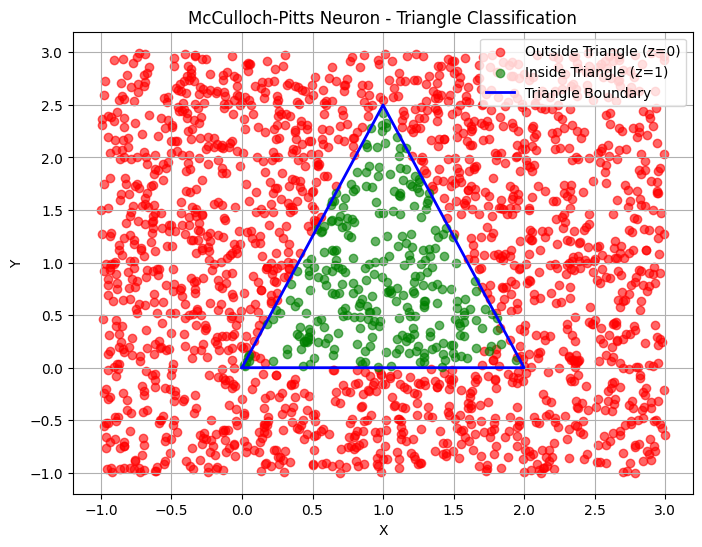

In [ ]:
# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(outside_x, outside_y, color='red', label='Outside Triangle (z=0)', alpha=0.6)
plt.scatter(inside_x, inside_y, color='green', label='Inside Triangle (z=1)', alpha=0.6)

# Draw triangle boundaries
triangle_x = [0, 2, 1, 0]
triangle_y = [0, 0, 2.5, 0]
plt.plot(triangle_x, triangle_y, 'b-', linewidth=2, label="Triangle Boundary")

plt.xlabel('X')
plt.ylabel('Y')
plt.title('McCulloch-Pitts Neuron - Triangle Classification')
plt.legend()
plt.grid(True)
plt.show()


Checking other two activation functions

Sigmoid

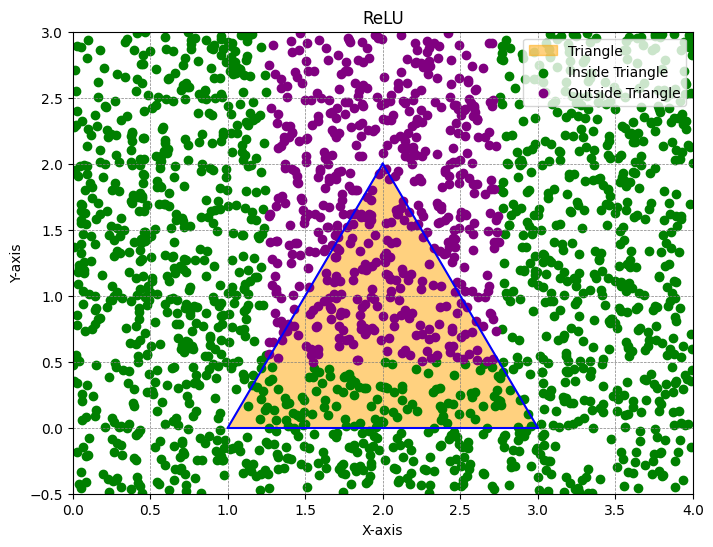

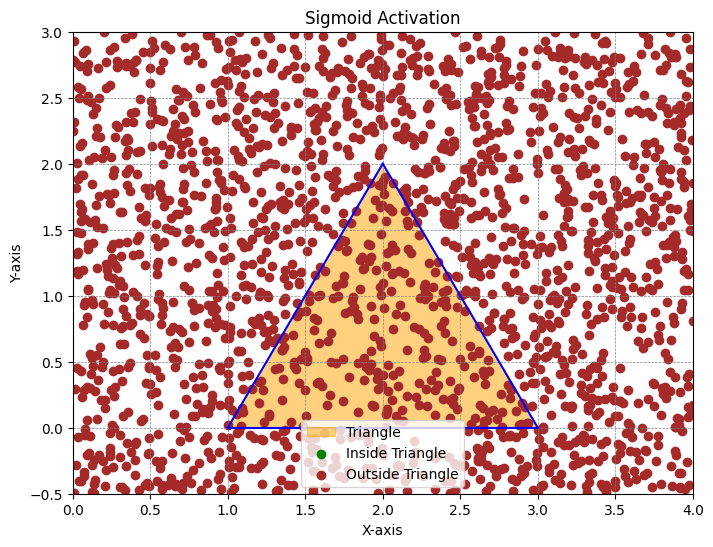

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define Activation Functions
def binary_step(x):
    return 1 if x >= 0 else 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

# Generalized Neuron Class
class Neuron:
    def __init__(self, weight_values, bias, activation):
        self.weights = np.array(weight_values)  # Assign Weights
        self.bias = bias  # Bias term
        self.activation = activation  # Activation function

    def activate(self, inputs):
        total_input = np.dot(self.weights, inputs) - self.bias
        return self.activation(total_input)

# Decision Function for Triangle Classification
def classify_region(x, y, activation_fn):
    node1 = Neuron([2, -1], 2, activation_fn)
    node2 = Neuron([-2, -1], -6, activation_fn)
    node3 = Neuron([0, 1], 0, activation_fn)
    node4 = Neuron([1, 1, 1], 3, activation_fn)

    act1 = node1.activate([x, y])
    act2 = node2.activate([x, y])
    act3 = node3.activate([x, y])
    act4 = node4.activate([act1, act2, act3])

    return act4

# Generate Random Points
def get_random_coords():
    x_coord = random.uniform(0, 4)
    y_coord = random.uniform(-0.5, 3)
    return x_coord, y_coord

# Function to Plot Classifications
def visualize_classification(activation_fn, plot_title, point_color):
    outside_points = []
    inside_points = []
    num_samples = 2000

    for _ in range(num_samples):
        x_val, y_val = get_random_coords()
        classification_result = classify_region(x_val, y_val, activation_fn)
        if classification_result < 0.5:  # Mark as outside (lower activation threshold)
            outside_points.append((x_val, y_val))
        else:  # Mark as inside
            inside_points.append((x_val, y_val))

    # Extracting coordinates for visualization
    red_x, red_y = zip(*outside_points) if outside_points else ([], [])
    green_x, green_y = zip(*inside_points) if inside_points else ([], [])

    # Triangle Boundary Definition
    plt.figure(figsize=(8, 6))
    P1 = (2, 2)
    P2 = (3, 0)
    P3 = (1, 0)
    plt.plot([P1[0], P2[0]], [P1[1], P2[1]], 'b')
    plt.plot([P2[0], P3[0]], [P2[1], P3[1]], 'b')
    plt.plot([P3[0], P1[0]], [P3[1], P1[1]], 'b')
    plt.fill([P1[0], P2[0], P3[0]], [P1[1], P2[1], P3[1]], color='orange', alpha=0.5, label='Triangle')

    # Scatter plot for classified points
    plt.scatter(green_x, green_y, color='green', label='Inside Triangle')
    plt.scatter(red_x, red_y, color=point_color, label='Outside Triangle')

    # Formatting & Labels
    plt.xlim(0, 4)
    plt.ylim(-0.5, 3)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.title(plot_title)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.show()

# Run Classification & Visualization for Different Activation Functions
visualize_classification(relu, "ReLU", "purple")
visualize_classification(sigmoid, "Sigmoid Activation", "brown")



Q2